In [2]:
import pandas as pd
import seaborn as sns
import os, glob
import matplotlib.pyplot as plt

root_data = '../data'

In [3]:
# Load weather data
df_w = pd.read_csv(os.path.join(root_data, 'weather/open_meteo_com.csv'))
df_w.head()
df_w['date_index'] = pd.to_datetime(df_w['time'])
df_w = df_w.set_index('date_index')
df_w

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),...,et0_fao_evapotranspiration (mm),vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³)
date_index,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01T00:00,4.5,86,2.3,-0.1,987.3,973.4,0.0,0.0,0.0,...,0.01,0.12,4.1,4.3,4.4,7.0,0.375,0.376,0.388,0.386
2018-01-01 01:00:00,2018-01-01T01:00,4.4,87,2.4,0.0,987.2,973.3,0.0,0.0,0.0,...,0.01,0.11,4.1,4.2,4.4,7.0,0.375,0.376,0.388,0.386
2018-01-01 02:00:00,2018-01-01T02:00,4.6,87,2.5,0.0,987.3,973.5,0.0,0.0,0.0,...,0.01,0.11,4.2,4.1,4.4,7.0,0.374,0.376,0.388,0.386
2018-01-01 03:00:00,2018-01-01T03:00,5.0,87,2.9,0.3,987.2,973.4,0.0,0.0,0.0,...,0.01,0.12,4.2,4.1,4.4,7.0,0.373,0.376,0.388,0.386
2018-01-01 04:00:00,2018-01-01T04:00,5.5,85,3.2,0.8,987.3,973.5,0.1,0.1,0.0,...,0.01,0.13,4.3,4.0,4.5,7.0,0.373,0.376,0.388,0.386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-19 20:00:00,2022-11-19T20:00,7.1,91,5.7,4.3,1008.8,994.8,0.0,0.0,0.0,...,0.00,0.09,7.1,7.5,9.8,11.8,0.373,0.385,0.391,0.349
2022-11-19 21:00:00,2022-11-19T21:00,7.3,89,5.7,4.3,1008.3,994.3,0.0,0.0,0.0,...,0.00,0.11,7.2,7.5,9.8,11.8,0.373,0.384,0.391,0.349
2022-11-19 22:00:00,2022-11-19T22:00,7.6,85,5.3,4.3,1007.4,993.4,0.1,0.1,0.0,...,0.01,0.16,7.2,7.6,9.8,11.8,0.374,0.384,0.391,0.349


In [4]:
# Upsample the weather data to every 30 min instead
df_w_upsampled = df_w.resample('30min').ffill()
#df_w_upsampled = df_w_upsampled.interpolate(method='linear')
df_w_upsampled['dtm'] = df_w_upsampled.index
df_w_upsampled

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),...,vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),dtm
date_index,,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00,2018-01-01T00:00,4.5,86,2.3,-0.1,987.3,973.4,0.0,0.0,0.0,...,0.12,4.1,4.3,4.4,7.0,0.375,0.376,0.388,0.386,2018-01-01 00:00:00
2018-01-01 00:30:00,2018-01-01T00:00,4.5,86,2.3,-0.1,987.3,973.4,0.0,0.0,0.0,...,0.12,4.1,4.3,4.4,7.0,0.375,0.376,0.388,0.386,2018-01-01 00:30:00
2018-01-01 01:00:00,2018-01-01T01:00,4.4,87,2.4,0.0,987.2,973.3,0.0,0.0,0.0,...,0.11,4.1,4.2,4.4,7.0,0.375,0.376,0.388,0.386,2018-01-01 01:00:00
2018-01-01 01:30:00,2018-01-01T01:00,4.4,87,2.4,0.0,987.2,973.3,0.0,0.0,0.0,...,0.11,4.1,4.2,4.4,7.0,0.375,0.376,0.388,0.386,2018-01-01 01:30:00
2018-01-01 02:00:00,2018-01-01T02:00,4.6,87,2.5,0.0,987.3,973.5,0.0,0.0,0.0,...,0.11,4.2,4.1,4.4,7.0,0.374,0.376,0.388,0.386,2018-01-01 02:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-19 22:00:00,2022-11-19T22:00,7.6,85,5.3,4.3,1007.4,993.4,0.1,0.1,0.0,...,0.16,7.2,7.6,9.8,11.8,0.374,0.384,0.391,0.349,2022-11-19 22:00:00
2022-11-19 22:30:00,2022-11-19T22:00,7.6,85,5.3,4.3,1007.4,993.4,0.1,0.1,0.0,...,0.16,7.2,7.6,9.8,11.8,0.374,0.384,0.391,0.349,2022-11-19 22:30:00
2022-11-19 23:00:00,2022-11-19T23:00,7.5,83,4.8,4.1,1006.7,992.7,0.4,0.4,0.0,...,0.18,7.2,7.6,9.7,11.8,0.376,0.383,0.391,0.349,2022-11-19 23:00:00


In [7]:
# Filter to time span of interest
df_w_range = df_w_upsampled[(df_w_upsampled['dtm'] > '2021-11-01') & (df_w_upsampled['dtm'] < '2022-12-01')]
df_w_range

,time,temperature_2m (°C),relativehumidity_2m (%),dewpoint_2m (°C),apparent_temperature (°C),pressure_msl (hPa),surface_pressure (hPa),precipitation (mm),rain (mm),snowfall (cm),...,vapor_pressure_deficit (kPa),soil_temperature_0_to_7cm (°C),soil_temperature_7_to_28cm (°C),soil_temperature_28_to_100cm (°C),soil_temperature_100_to_255cm (°C),soil_moisture_0_to_7cm (m³/m³),soil_moisture_7_to_28cm (m³/m³),soil_moisture_28_to_100cm (m³/m³),soil_moisture_100_to_255cm (m³/m³),dtm
date_index,,,,,,,,,,,,,,,,,,,,,
2021-11-01 00:30:00,2021-11-01T00:00,7.1,92,6.0,4.5,977.0,963.4,0.3,0.3,0.0,...,0.08,7.7,9.0,11.2,12.9,0.397,0.406,0.408,0.333,2021-11-01 00:30:00
2021-11-01 01:00:00,2021-11-01T01:00,7.5,93,6.5,4.9,976.7,963.1,0.5,0.5,0.0,...,0.07,7.8,9.0,11.2,12.9,0.398,0.405,0.408,0.334,2021-11-01 01:00:00
2021-11-01 01:30:00,2021-11-01T01:00,7.5,93,6.5,4.9,976.7,963.1,0.5,0.5,0.0,...,0.07,7.8,9.0,11.2,12.9,0.398,0.405,0.408,0.334,2021-11-01 01:30:00
2021-11-01 02:00:00,2021-11-01T02:00,7.7,92,6.5,4.9,976.7,963.2,0.8,0.8,0.0,...,0.08,8.0,8.9,11.2,12.9,0.404,0.405,0.408,0.334,2021-11-01 02:00:00
2021-11-01 02:30:00,2021-11-01T02:00,7.7,92,6.5,4.9,976.7,963.2,0.8,0.8,0.0,...,0.08,8.0,8.9,11.2,12.9,0.404,0.405,0.408,0.334,2021-11-01 02:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-19 22:00:00,2022-11-19T22:00,7.6,85,5.3,4.3,1007.4,993.4,0.1,0.1,0.0,...,0.16,7.2,7.6,9.8,11.8,0.374,0.384,0.391,0.349,2022-11-19 22:00:00
2022-11-19 22:30:00,2022-11-19T22:00,7.6,85,5.3,4.3,1007.4,993.4,0.1,0.1,0.0,...,0.16,7.2,7.6,9.8,11.8,0.374,0.384,0.391,0.349,2022-11-19 22:30:00
2022-11-19 23:00:00,2022-11-19T23:00,7.5,83,4.8,4.1,1006.7,992.7,0.4,0.4,0.0,...,0.18,7.2,7.6,9.7,11.8,0.376,0.383,0.391,0.349,2022-11-19 23:00:00


In [8]:
# Save new csv with the time interpolation to every 30 min 
df_w_range.to_csv(os.path.join(root_data, 'weather/open_meteo_com_interpolated.csv'))

In [10]:
df_w_range.dtm.describe()

C:\Users\Jordi\AppData\Local\Temp\ipykernel_15240\2918837003.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_w_range.dtm.describe()


count                   18432
unique                  18432
top       2021-11-01 00:30:00
freq                        1
first     2021-11-01 00:30:00
last      2022-11-20 00:00:00
Name: dtm, dtype: object

In [13]:
24 * 2 * (365 + 20)

18480

<AxesSubplot:xlabel='date_index'>

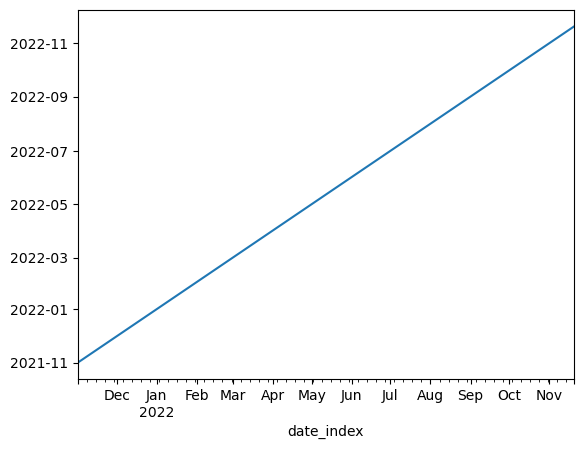

In [16]:
df_w_range.dtm.plot()

<AxesSubplot:xlabel='date_index'>

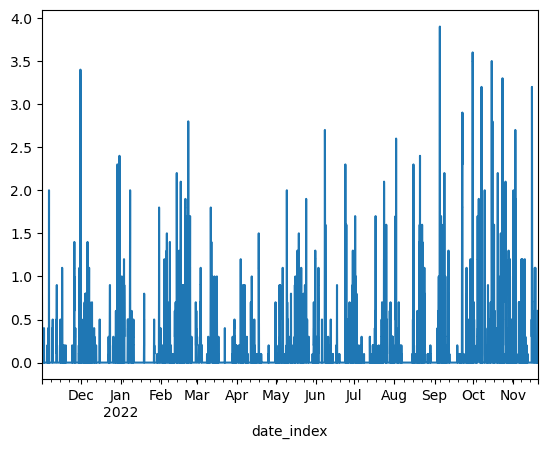

In [17]:
df_w_range['rain (mm)'].plot()